In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

Loading the IRIS dataset directly from load_datasets

In [3]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.shape

(150, 5)

In [6]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

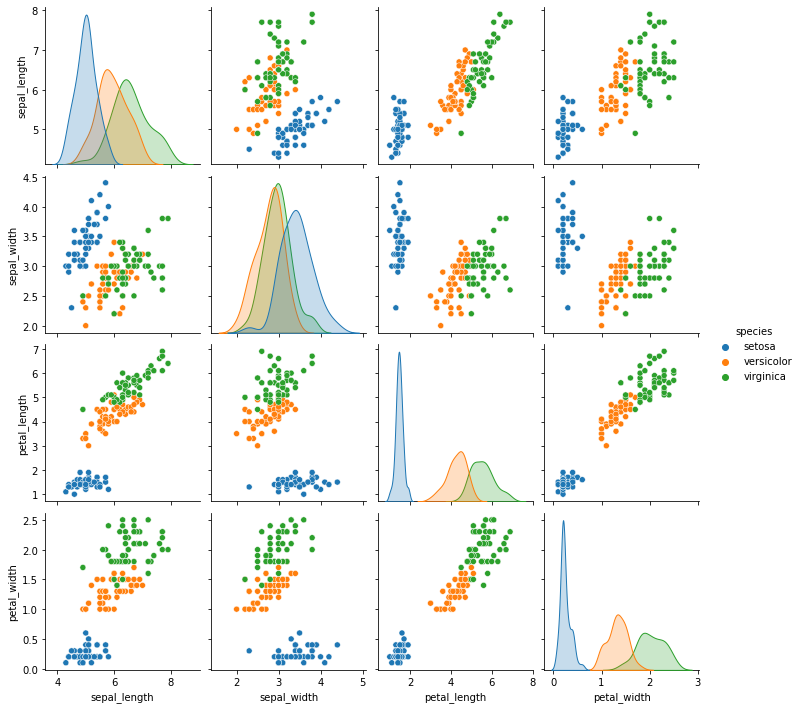

In [8]:
sns.pairplot(data=df, hue = 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

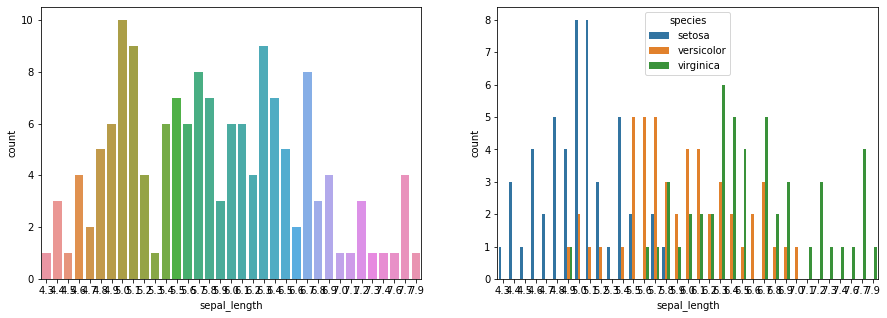

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.countplot(x='sepal_length',data=df)
plt.subplot(122)
sns.countplot(x='sepal_length',hue='species',data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

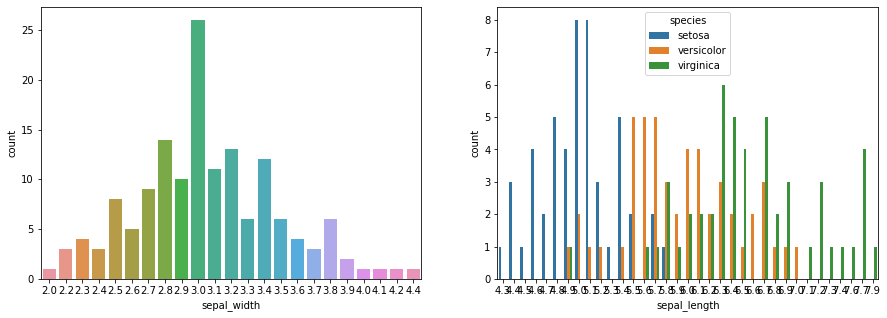

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.countplot(x='sepal_width',data=df)
plt.subplot(122)
sns.countplot(x='sepal_length',hue='species',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

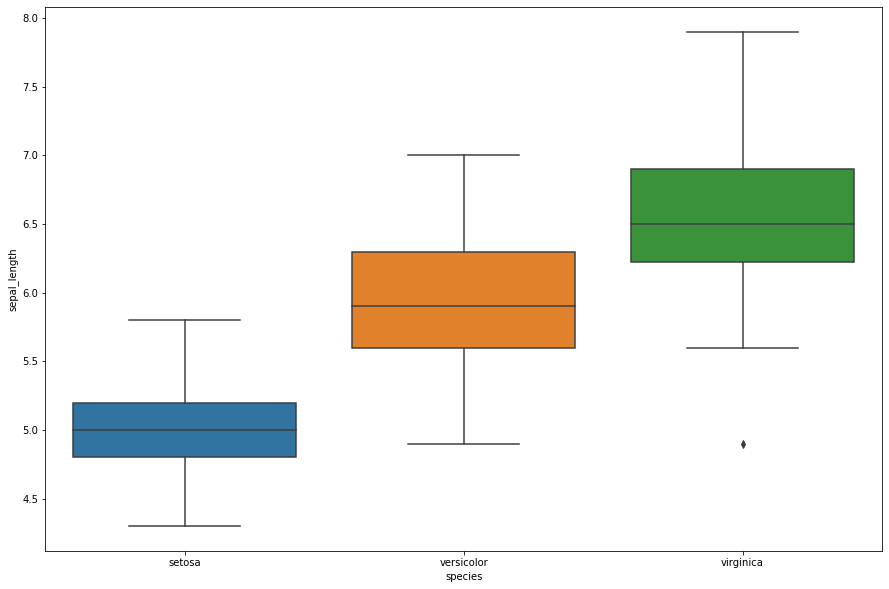

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='species',y='sepal_length',data=df)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

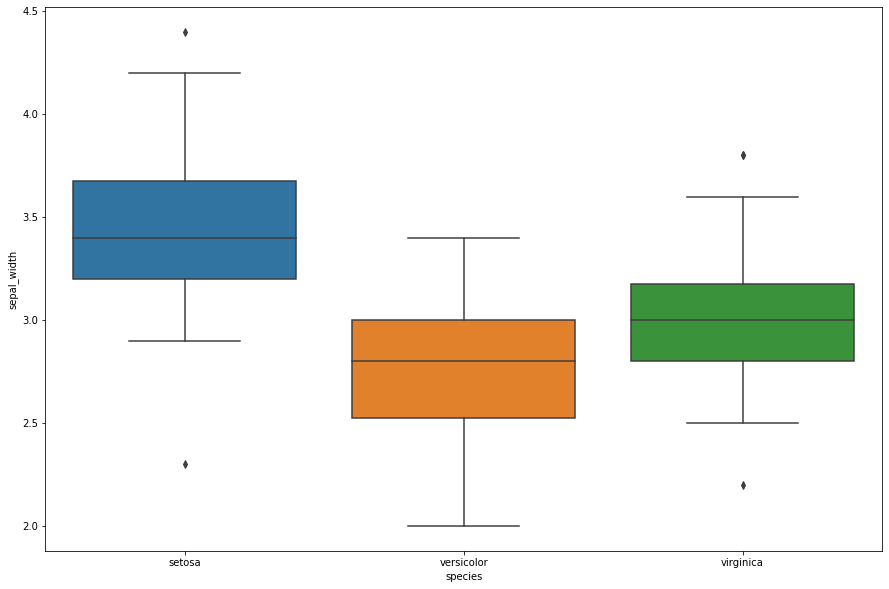

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='species',y='sepal_width',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

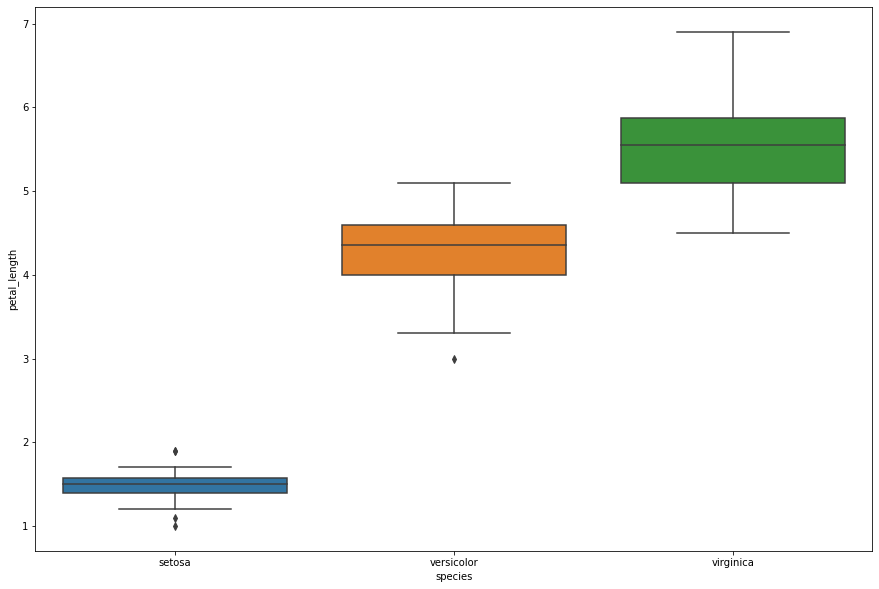

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x='species',y='petal_length',data=df)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

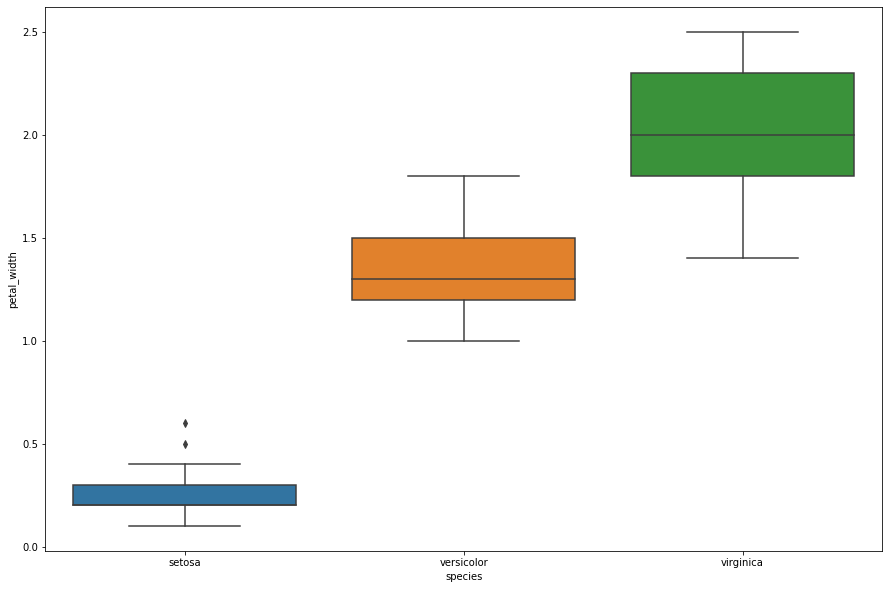

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x='species',y='petal_width',data=df)

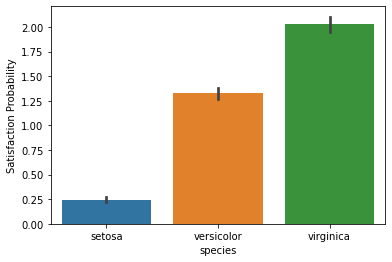

In [15]:
def barchart(feature):
    g = sns.barplot(x=feature,y="petal_width",data=df)
    g = g.set_ylabel("Satisfaction Probability")
barchart('species')

C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

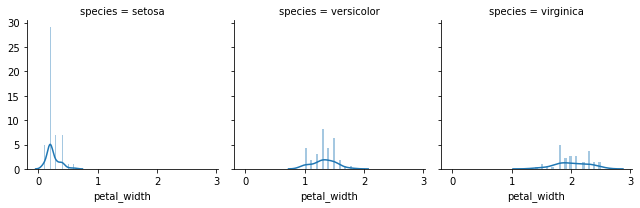

In [16]:
g = sns.FacetGrid(df, col = "species")
g.map(sns.distplot, "petal_width", bins = 25)
plt.show()

C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

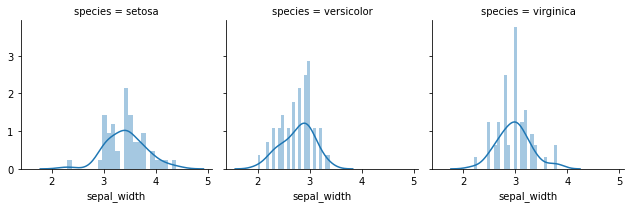

In [17]:
g = sns.FacetGrid(df, col = "species")
g.map(sns.distplot, "sepal_width", bins = 25)
plt.show()

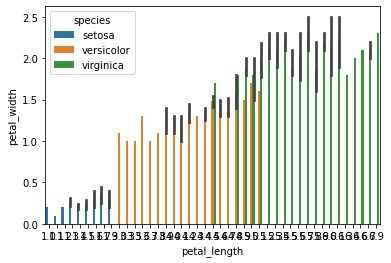

In [18]:
sns.barplot(x="petal_length", y="petal_width", hue="species", data=df);

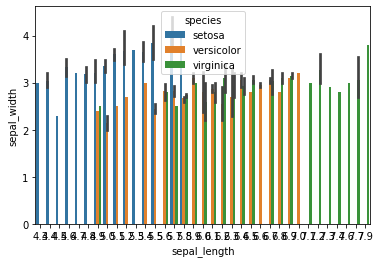

In [19]:
sns.barplot(x="sepal_length", y="sepal_width", hue="species", data=df);

C:\Users\WoU_AI_ML\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


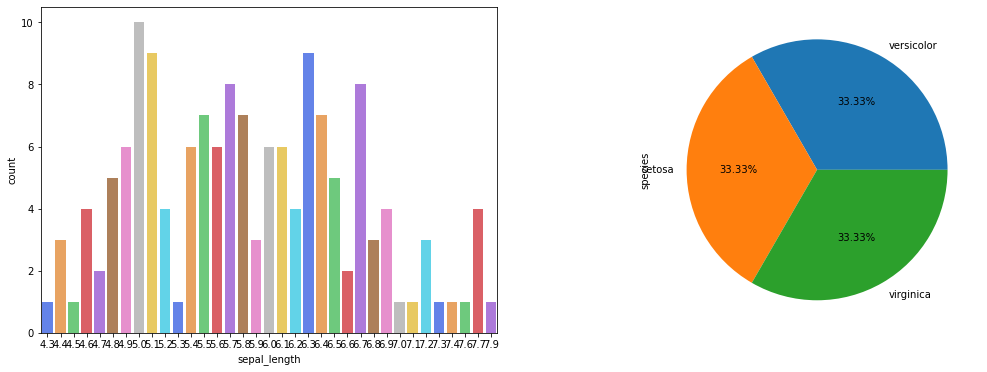

In [20]:
f, ax  = plt.subplots(1,2,figsize = (18,6))
sns.countplot(df['sepal_length'],ax=ax[0],palette = 'bright',alpha=0.7)

count = df['species'].value_counts(normalize=True)
count.plot.pie(autopct="%.2f%%",explode = None,ax=ax[1])
plt.show()

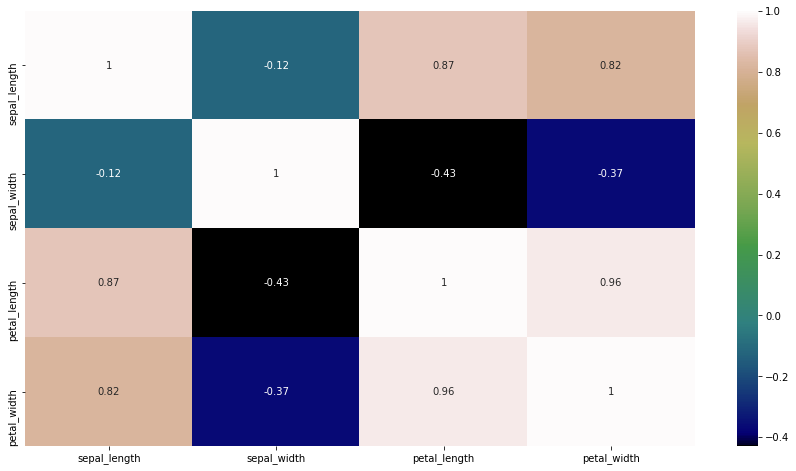

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()

In [22]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

In [23]:
X = df1

In [24]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [25]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Here we used label encorder to convert string data to numeric data of sets

In [26]:
y = target

In [27]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
from sklearn.model_selection import train_test_split#
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state =0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [31]:
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
y_pred=clf.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



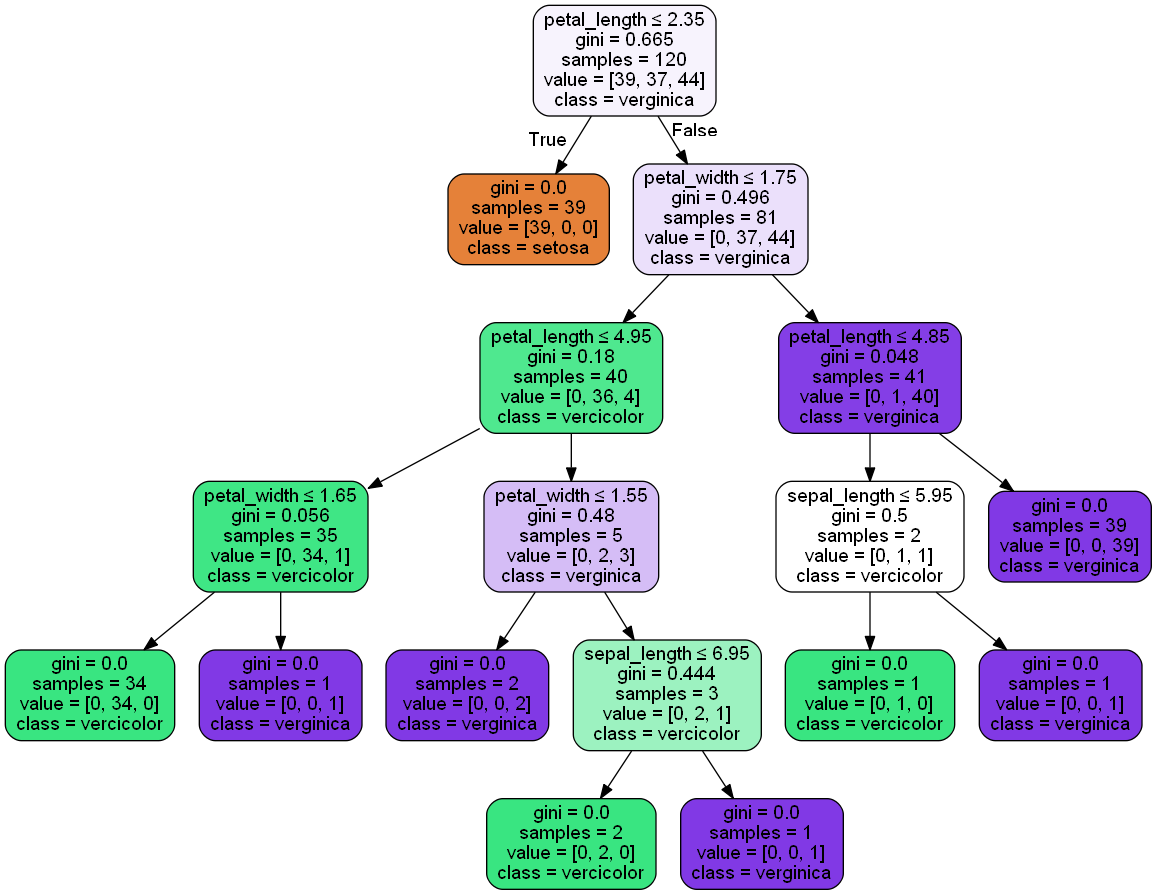

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = df1.columns, 
                class_names =["setosa", "vercicolor", "verginica"] ,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

In [33]:
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, test_scores_mean, label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Training Error', fontsize = 14)
    plt.ylabel('Cross Validation Error', fontsize = 14)
    plt.tight_layout()

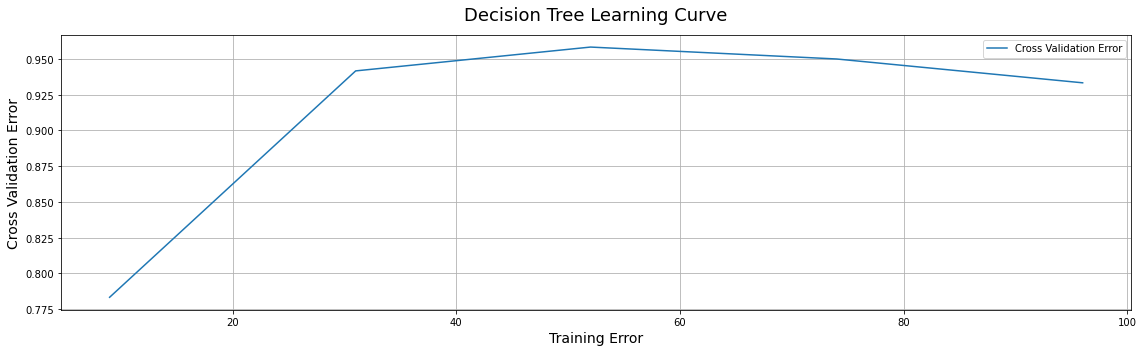

In [34]:
from sklearn.model_selection import learning_curve, validation_curve
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)
#pred_dtc=dtc.predict(X_test)
plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

SIMPLE LINEAR REGRESSION

In [35]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


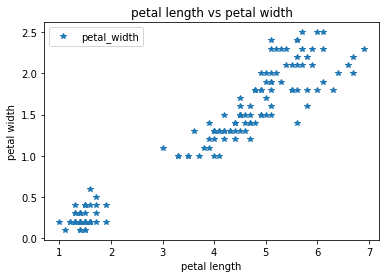

In [37]:
df.plot(x='petal_length', y='petal_width', style='*')  
plt.title('petal length vs petal width')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.show()

In [38]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
df["target"]=target

In [40]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [41]:
X = df['petal_length'].values.reshape(-1,1)
y = df['sepal_length'].values.reshape(-1,1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [44]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[4.28859]
[[0.41727277]]


In [45]:
y_pred = regressor.predict(X_test)

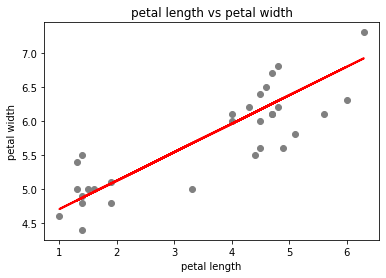

In [46]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('petal length vs petal width')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.show()

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.3141030443533809
Mean Squared Error: 0.1509785250913978
Root Mean Squared Error: 0.38855955153798216


MULTI LINEAR REGRESSION

In [48]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [49]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['target'].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

0.16149541375178922
[-0.10627533 -0.0397204   0.22894234  0.61123074]


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.18641707995607307
Mean Squared Error: 0.05092322206134323
Root Mean Squared Error: 0.22566174257357677


POLYNOMIAL REGRESSION

In [55]:
df1=pd.read_csv("C:\\Users\\WoU_AI_ML\\Desktop\\Position_Salaries.csv")

In [56]:
df1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [57]:
X = df1['Level'].values.reshape(-1,1)
y = df1['Salary'].values.reshape(-1,1)

In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [59]:
regressor = LinearRegression()

In [60]:
regressor.fit(X,y)

LinearRegression()

In [61]:
y_pred=regressor.predict(X)


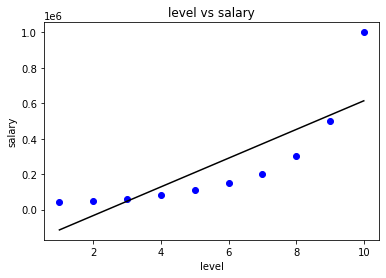

In [62]:
plt.scatter(X, y, color = "blue")
plt.plot(X, y_pred, color = 'black')
plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()


In [63]:
from sklearn.preprocessing import PolynomialFeatures


In [64]:
poly=PolynomialFeatures(degree = 4)


In [65]:
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

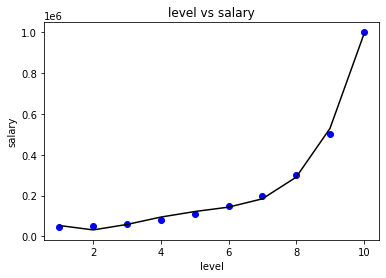

In [66]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_poly_pred, color = 'black')
plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()


In [67]:
regressor.predict(poly.fit_transform([[2.5]]))


array([[42102.54589164]])

In [68]:
regressor.coef_

array([[      0.        , -211002.33100266,   94765.44289054,
         -15463.2867133 ,     890.15151515]])

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is ' + str(rmse))
print('r2 is ' +str(r2))

RMSE is 14503.234909626832
r2 is 0.9973922891706614
